# TopoCurve Analysis with FFT Filtering & Curvature Computation
This script processes a GeoTIFF Digital Elevation Model (DEM) file using FFT-based spectral filtering, calculates curvatures, and generates plots for visualization.

1. Import Required Modules

In [1]:
#!pip install topocurve

In [2]:
from topocurve import TopoCurve, SpectralFiltering

import numpy as np
import matplotlib.pyplot as plt

2. Load the DEM File

In [3]:
# Define the path to the TIFF file
tiff_file = '../references/DEM_files/Purgatory.tif'

# Instantiate TopoCurve object
dem = TopoCurve(tiff_file)

# Instantiate SpectralFiltering object
spectral_filter = SpectralFiltering(tiff_file)


3. Apply FFT Filtering and Compute Curvature

In [4]:
# Apply FFT filtering with a lowpass filter at 190-200
dx, dy, filtered_elevation = spectral_filter.FFT([190, 200], 'lowpass', 0)

# Compute curvature attributes
K1, K2, KM, KG = dem.CurveCalc(filtered_elevation, dx, dy, 0)

# Print results
print("Curvature values (K1, K2, KM, KG):")
print(K1, K2, KM, KG)


Curvature values (K1, K2, KM, KG):
[[ 2.17604320e-05  3.84778810e-05  4.33925576e-06 ...  5.46539833e-06
   2.44508992e-04  2.11270498e-04]
 [ 3.57069813e-05  1.30175132e-05 -4.60162212e-07 ... -4.43545711e-06
   1.09660285e-04  2.44305505e-04]
 [ 2.23479079e-06 -2.06521311e-06  2.56296913e-06 ...  8.70603012e-06
  -7.55680564e-06  8.31281683e-06]
 ...
 [ 1.19979323e-05  1.36951958e-06  1.15812317e-05 ...  4.72463080e-06
   7.05975774e-06  3.01144864e-05]
 [ 6.86605547e-05  6.22683750e-05  3.22958049e-06 ...  9.00899986e-06
   2.28936434e-06  4.05254600e-06]
 [ 8.23492744e-05  6.88558683e-05  8.53636622e-06 ...  3.44605326e-05
   6.49802099e-06  2.86788551e-05]] [[-6.29246922e-05 -9.66540699e-06 -5.22387565e-05 ... -2.70692868e-04
  -9.05752681e-05 -6.12903869e-04]
 [-7.32723005e-06  9.34814626e-06 -2.02349413e-05 ... -1.18129348e-04
   1.03960614e-04 -9.45351082e-05]
 [-4.20830084e-05 -1.28194196e-05  2.03828651e-07 ...  4.13774433e-06
  -1.19928941e-04 -2.71741888e-04]
 ...
 [-4.4789

4. Plot DEM and Curvature Maps

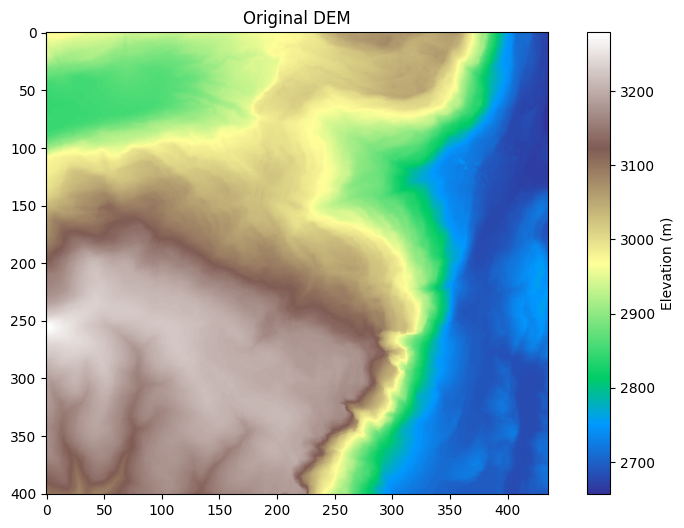

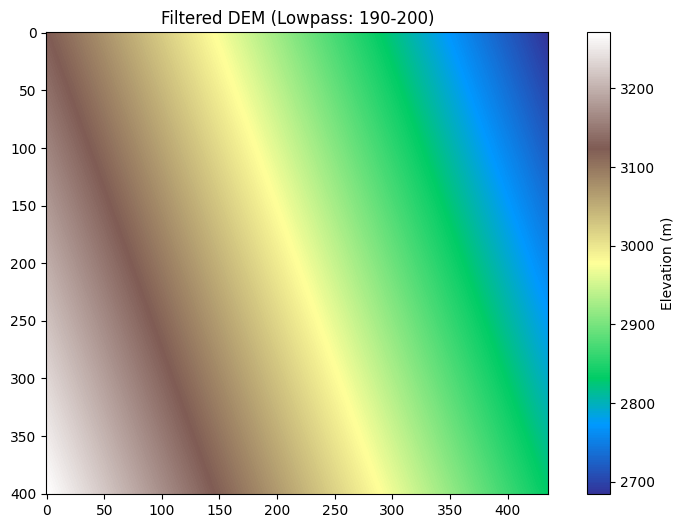

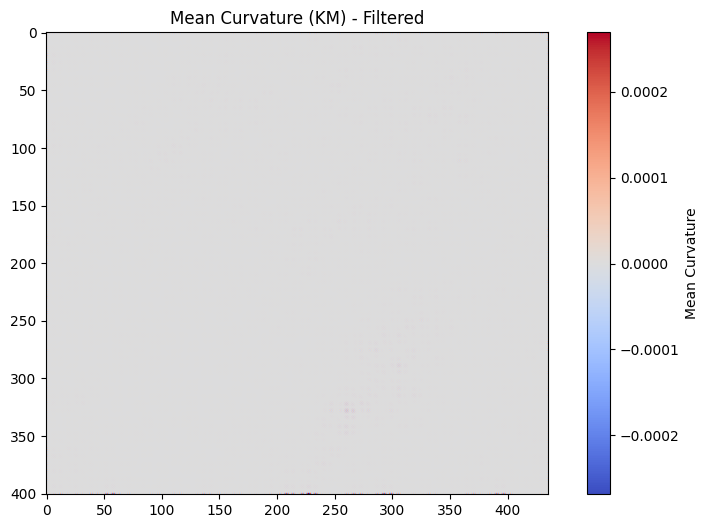

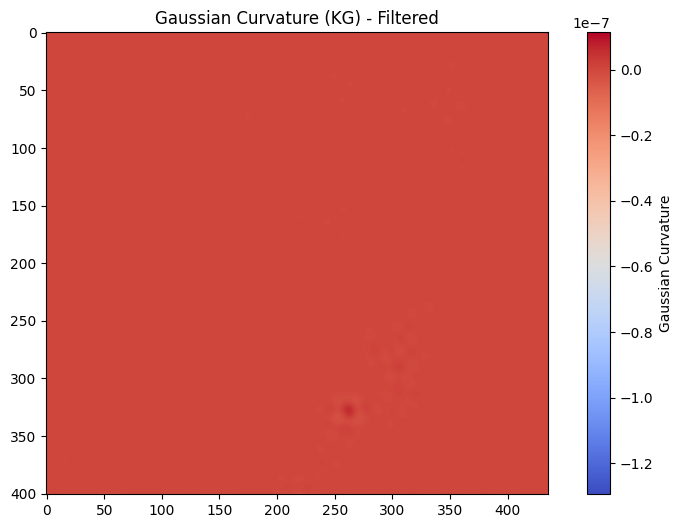

In [5]:
# Plot the filtered elevation values
plt.figure(figsize=(10, 6))
plt.imshow(dem.z_array, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title('Original DEM')
plt.show()

# Plot the filtered elevation values
plt.figure(figsize=(10, 6))
plt.imshow(filtered_elevation, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title('Filtered DEM (Lowpass: 190-200)')
plt.show()

# Plot Mean Curvature (KM)
plt.figure(figsize=(10, 6))
plt.imshow(KM, cmap='coolwarm')
plt.colorbar(label='Mean Curvature')
plt.title('Mean Curvature (KM) - Filtered')
plt.show()

# Plot Gaussian Curvature (KG)
plt.figure(figsize=(10, 6))
plt.imshow(KG, cmap='coolwarm')
plt.colorbar(label='Gaussian Curvature')
plt.title('Gaussian Curvature (KG) - Filtered')
plt.show()


5. Second Filtering (Lowpass: [90, 100])

In [6]:
dx, dy, ZFilt = spectral_filter.FFT([90, 100], "lowpass", 0.5)

# Compute curvature attributes again
K1, K2, KM, KG = dem.CurveCalc(ZFilt, dx, dy, 0)

# Print results
print("Curvature values (K1, K2, KM, KG) for second filtering:")
print(K1, K2, KM, KG)


Curvature values (K1, K2, KM, KG) for second filtering:
[[ 9.46666244e-04  1.64523574e-04  1.18813202e-03 ...  1.96451207e-05
   1.12792977e-04  6.21340865e-05]
 [ 1.58878377e-04 -4.67611578e-05  3.26711874e-04 ... -1.84726236e-06
   5.26279844e-05  1.14757906e-04]
 [ 1.13664561e-03  2.88173088e-04 -5.50259274e-05 ...  6.08896128e-05
   1.20561789e-05  2.07794028e-05]
 ...
 [ 9.18098434e-05 -1.06101423e-04  2.84573659e-04 ...  2.66769639e-05
   6.39770775e-05  2.08550234e-04]
 [ 1.27381409e-03  4.84333036e-04 -7.94832710e-05 ...  2.06485004e-05
   1.18245149e-05  2.63958117e-05]
 [ 6.84710569e-04  1.28678523e-03  1.00632970e-04 ...  1.43256190e-04
   1.42843444e-05  9.85099515e-05]] [[-4.34528735e-04 -8.48583329e-04 -6.86558630e-05 ... -1.22440387e-04
  -1.90664023e-05 -1.32824898e-04]
 [-8.37928554e-04 -3.08596033e-04  3.24016502e-05 ... -4.02269752e-05
   5.34370794e-06 -3.08693805e-05]
 [-6.08770830e-05  5.15678120e-05 -1.82662211e-04 ... -1.67867662e-05
  -8.29276820e-05 -1.9011586

6. Plot and Save Second Filtered Results

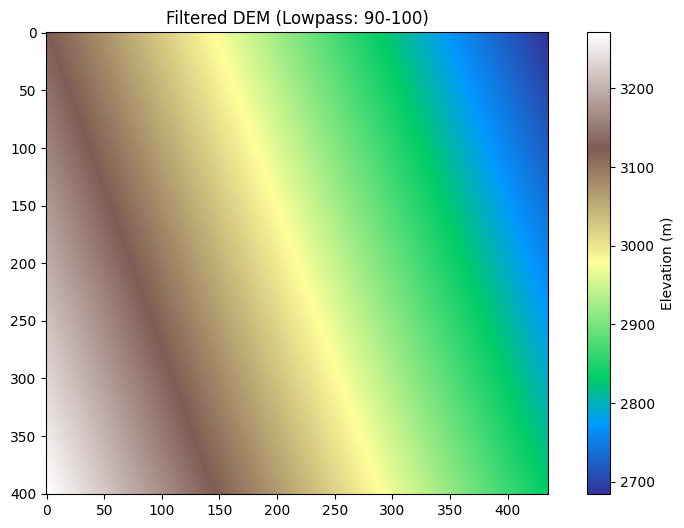

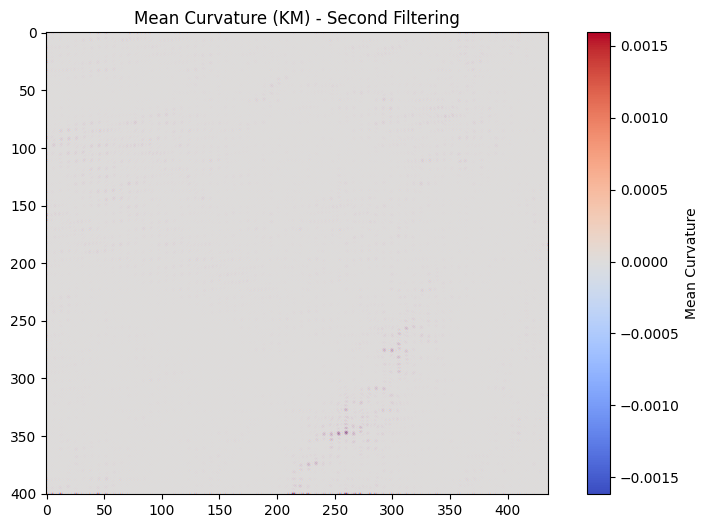

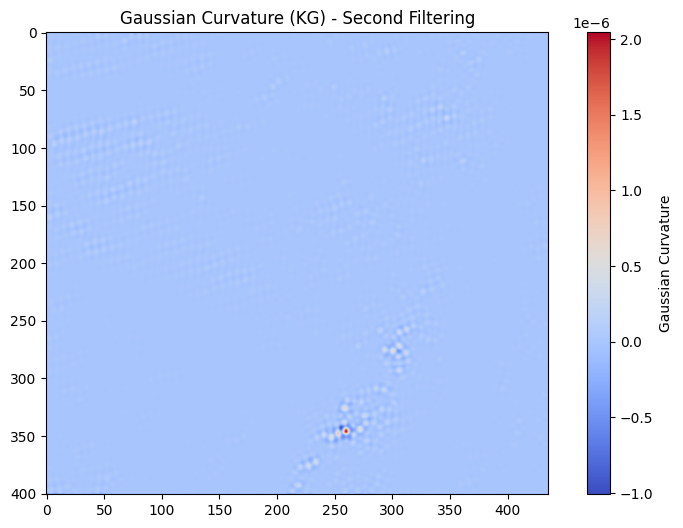

In [7]:
# Save the FFT filtered DEM
dem.plot(ZFilt, "fftdem.png")

# Plot the second filtered elevation values
plt.figure(figsize=(10, 6))
plt.imshow(ZFilt, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title('Filtered DEM (Lowpass: 90-100)')
plt.show()

# Plot Mean Curvature (KM) for the second filtered data
plt.figure(figsize=(10, 6))
plt.imshow(KM, cmap='coolwarm')
plt.colorbar(label='Mean Curvature')
plt.title('Mean Curvature (KM) - Second Filtering')
plt.show()

# Plot Gaussian Curvature (KG) for the second filtered data
plt.figure(figsize=(10, 6))
plt.imshow(KG, cmap='coolwarm')
plt.colorbar(label='Gaussian Curvature')
plt.title('Gaussian Curvature (KG) - Second Filtering')
plt.show()
